<a href="https://colab.research.google.com/github/Milham10/PracticeML/blob/main/FruitImagesDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
path = '/content/drive/MyDrive/dataset/archive.zip'

In [5]:
zip_ref   = zipfile.ZipFile(path, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
train_path = '/content/train_zip/train/'
test_path = '/content/test_zip/test/'

In [13]:
labels_train = []
labels_test = []

path_train = []
path_test = []

In [14]:
for filename in os.listdir(train_path):
  #Menyortir file dengan format jpg
  if (filename.split('.')[1]=='jpg'):
    #mengambil nama depan file yang dipisahkan oleh "_" lalu dijadikan label
    labels_train.append(filename.split('_')[0])
    path_train.append(os.path.join(train_path, filename))

for filename in os.listdir(test_path):
  if (filename.split('.')[1]=='jpg'):
    labels_test.append(filename.split('_')[0])
    path_test.append(os.path.join(test_path, filename))

In [15]:
#Unique: meringkas label yang sama
labels_train_unique = np.unique(np.array(labels_train))
labels_test_unique = np.unique(np.array(labels_test))

print(f'Label Training Dataset Buah: {labels_train_unique}')
print(f'Number of fileimage in dataset train: {len(path_train)}')
print(f'Label Validation Dataset Buah: {labels_test_unique}')
print(f'Number of fileimage in dataset test: {len(path_test)}')

Label Training Dataset Buah: ['apple' 'banana' 'mixed' 'orange']
Number of fileimage in dataset train: 240
Label Validation Dataset Buah: ['apple' 'banana' 'mixed' 'orange']
Number of fileimage in dataset test: 60


In [16]:
X_train = []

for path in path_train:
    img = cv2.imread(path)    
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    final_img =  cv2.resize(rgb_img, (150,150))
    X_train.append(final_img)
    
X_train = np.array(X_train)

In [17]:
X_test = []

for path in path_test:
    img = cv2.imread(path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    final_img = cv2.resize(rgb_img, (150,150))
    X_test.append(final_img)
    
X_test = np.array(X_test) 

In [18]:
print(X_train.shape)
print(X_test.shape)

(240, 150, 150, 3)
(60, 150, 150, 3)


In [19]:
fruits = {}

for i in range(len(labels_train_unique)):
  fruits[labels_train_unique[i]] = i
fruits

{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}

In [20]:
temp_train = []
temp_test = []

for label in labels_train:
  temp_train.append(fruits.get(label))

for label in labels_test:
  temp_test.append(fruits.get(label))

print(f'Lenght of train data {len(temp_train)}')
print(f'Lenght of test data {len(temp_test)}')

Lenght of train data 240
Lenght of test data 60


In [21]:
#kenapa 4? karena di dataset ini di ada 4 labels yaitu (orange, banana, apel, mixed) default type nya float32
y_train = tf.keras.utils.to_categorical(temp_train, 4)
y_test = tf.keras.utils.to_categorical(temp_test, 4)

In [22]:
#mengubah tipe x_train, dan x_test menjadi float sesuai dengan y_train, y_test
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [23]:
#Normalize
X_train = X_train/255.0
X_test = X_test/255.0

In [24]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (240, 150, 150, 3)
y_train shape: (240, 4)
X_test shape: (60, 150, 150, 3)
y_test shape: (60, 4)


In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
    ])

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 74, 74, 16)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 64)       

In [34]:
from tensorflow.keras.optimizers import Adam
optmizers = Adam(learning_rate=0.001)
model.compile(optimizer=optmizers,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_test, y_test))

Epoch 1/10
8/8 [==============================] - 6s 693ms/step - loss: 1.3116 - accuracy: 0.3042 - val_loss: 1.2678 - val_accuracy: 0.4500
Epoch 2/10
8/8 [==============================] - 5s 665ms/step - loss: 1.0677 - accuracy: 0.5792 - val_loss: 0.9387 - val_accuracy: 0.8333
Epoch 3/10
8/8 [==============================] - 5s 660ms/step - loss: 0.6899 - accuracy: 0.7583 - val_loss: 0.7110 - val_accuracy: 0.8500
Epoch 4/10
8/8 [==============================] - 5s 660ms/step - loss: 0.5473 - accuracy: 0.8083 - val_loss: 0.5984 - val_accuracy: 0.8500
Epoch 5/10
8/8 [==============================] - 5s 662ms/step - loss: 0.3840 - accuracy: 0.8583 - val_loss: 0.5359 - val_accuracy: 0.9000
Epoch 6/10
8/8 [==============================] - 5s 655ms/step - loss: 0.4168 - accuracy: 0.8833 - val_loss: 0.4737 - val_accuracy: 0.8833
Epoch 7/10
8/8 [==============================] - 5s 659ms/step - loss: 0.2550 - accuracy: 0.9208 - val_loss: 0.4183 - val_accuracy: 0.9000
Epoch 8/10
8/8 [====

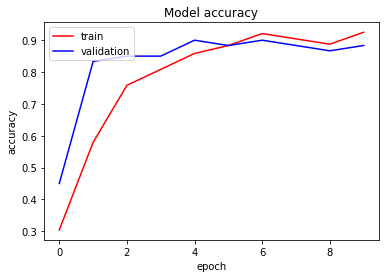

In [36]:
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

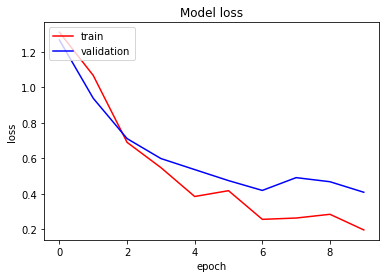

In [37]:
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [38]:
score, accuracy = model.evaluate(X_test, y_test)
print('Test score achieved:', score)
print('Test accuracy achieved:', accuracy)

2/2 [==============================] - 0s 161ms/step - loss: 0.4079 - accuracy: 0.8833
Test score achieved: 0.40791696310043335
Test accuracy achieved: 0.8833333253860474


In [39]:
pred = model.predict(X_test)

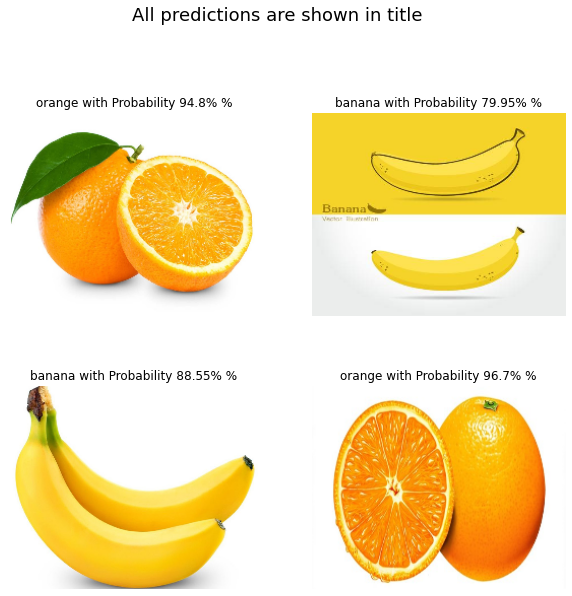

In [40]:
fig, axs= plt.subplots(2,2, figsize=[10,10])
fig.subplots_adjust(hspace=.01)


count=0
for i in range(2):    
    for j in range(2):  
        
        img = cv2.imread(path_test[count])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        img = cv2.resize(img, (250,200))
        result = np.argsort(pred[count])[::-1]
        
        i_max = -1
        max_val = ""
        for (k,val) in enumerate(fruits.keys()):
            
            if(pred[count][k] > i_max):
                i_max = pred[count][k]
                max_val = val
        
        txt = str(max_val) + " with Probability "+ str("{:.4}%".format(i_max*100)) + " %"
            
        
        axs[i][j].imshow(img)
        axs[i][j].set_title(txt)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("All predictions are shown in title", fontsize = 18)        
plt.show()

In [41]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

lb=LabelBinarizer()
print('Evaluating Network...')
print(classification_report(y_test.argmax(axis=1),
	pred.argmax(axis=1), target_names= fruits))

Evaluating Network...
              precision    recall  f1-score   support

       apple       0.86      1.00      0.93        19
      banana       0.94      0.89      0.91        18
       mixed       0.50      0.20      0.29         5
      orange       0.89      0.94      0.92        18

    accuracy                           0.88        60
   macro avg       0.80      0.76      0.76        60
weighted avg       0.87      0.88      0.87        60



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pisang.jpg to pisang.jpg


In [ ]:
from PIL import Image

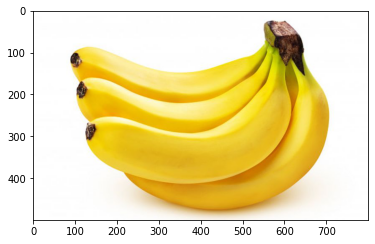

In [ ]:
image_testing = Image.open('/content/pisang.jpg')
plt.imshow(image_testing)
plt.show()

In [ ]:
image_testing=np.array(image_testing.resize((50,50))) / 255.0
image_testing.shape

(50, 50, 3)

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 50, 50, 3)


In [ ]:
output = model.predict(image_testing, 1)
print(output)
print(fruits)

[[0. 1. 0. 0.]]
{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}
